# Import Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load Dataset

In [65]:
lab_lbp_glrlm_tamura = pd.read_csv("./features/LAB_LBP_GLRLM_TAMURA.csv")
rgb_lbp_glrlm_tamura = pd.read_csv("./features/RGB_LBP_GLRLM_TAMURA.csv")
yuv_lbp_glrlm_tamura = pd.read_csv("./features/YUV_LBP_GLRLM_TAMURA.csv")

**lab_lbp_glrlm_tamura overview**

In [66]:
lab_lbp_glrlm_tamura.head()

image_id     mean_l    mean_a    mean_b      std_l     std_a      std_b  \
0     AAB1  18.849328  1.752398 -0.337750  37.074306  3.934478   1.343585   
1     AAC1  19.906046  5.756381  1.927765  34.348005  9.802689   3.534989   
2     AAD1  17.926753  4.025589  0.589959  34.560425  8.224693   1.927143   
3     AAE1  18.390874  1.398167  0.904904  36.842083  3.458787   2.450887   
4     AAF1  29.333459  1.427507  7.509736  41.702103  3.075837  11.373738   

     skew_l    skew_a    skew_b  ... LGLRE_deg135    HGL_deg135  \
0  1.487315  2.393427 -2.270352  ...     0.133517  29700.714353   
1  1.176220  1.292782  1.746271  ...     0.140771  22063.845249   
2  1.439802  1.865132  2.425177  ...     0.123736  27172.994506   
3  1.526591  2.784932  3.271559  ...     0.134276  32100.903474   
4  0.744479  1.447338  1.040646  ...     0.127056  29096.857110   

   SRLGLE_deg135  SRHGLE_deg135  LRLGLE_deg135  LRHGLE_deg135  \
0       0.101089   28390.428736            1.0   35857.204313   
1       0.097302   20092.092875            1.0   32394.959228   
2       0.088413   24980.412223            1.0   39115.454674   
3       0.095907   29096.427474            1.0   49395.423276   
4       0.091509   27038.088027            1.0   39915.088191   

   coarseness_tamura  contrast_tamura  directionality_tamura  roughness_tamura  
0           6.713146        70.186678             474.581575         76.899824  
1           8.696334        69.317828             519.135893         78.014162  
2           6.721478        65.847310             500.681931         72.568788  
3           8.504060        69.065127             595.749818         77.569187  
4           8.636391        93.265093             494.853602        101.901484  

[5 rows x 64 columns]

**rgb_lbp_glrlm_tamura overview**

In [67]:
rgb_lbp_glrlm_tamura.head()

image_id     mean_r     mean_g     mean_b       std_r       std_g  \
0     AAB1  50.925730  46.587235  48.386655   98.595704   91.788232   
1     AAC1  61.302620  45.531248  46.113789  104.191273   78.743633   
2     AAD1  52.813479  42.169703  43.904742  100.370966   81.652888   
3     AAE1  50.005615  45.549098  44.835026   99.136211   91.361920   
4     AAF1  82.054587  72.446887  59.653489  114.845242  103.168869   

       std_b    skew_r    skew_g    skew_b  ... LGLRE_deg135    HGL_deg135  \
0  95.080962  1.477791  1.497848  1.490128  ...     0.133517  29700.714353   
1  79.784100  1.173572  1.186264  1.186547  ...     0.140771  22063.845249   
2  84.817344  1.424472  1.466743  1.454343  ...     0.123736  27172.994506   
3  89.972472  1.516693  1.537230  1.541720  ...     0.134276  32100.903474   
4  85.330659  0.736521  0.753406  0.797532  ...     0.127056  29096.857110   

   SRLGLE_deg135  SRHGLE_deg135  LRLGLE_deg135  LRHGLE_deg135  \
0       0.101089   28390.428736            1.0   35857.204313   
1       0.097302   20092.092875            1.0   32394.959228   
2       0.088413   24980.412223            1.0   39115.454674   
3       0.095907   29096.427474            1.0   49395.423276   
4       0.091509   27038.088027            1.0   39915.088191   

   coarseness_tamura  contrast_tamura  directionality_tamura  roughness_tamura  
0           6.713146        70.186678             474.581575         76.899824  
1           8.696334        69.317828             519.135893         78.014162  
2           6.721478        65.847310             500.681931         72.568788  
3           8.504060        69.065127             595.749818         77.569187  
4           8.636391        93.265093             494.853602        101.901484  

[5 rows x 64 columns]

**yuv_lbp_glrlm_tamura overview**

In [68]:
yuv_lbp_glrlm_tamura.head()

image_id     mean_y    mean_u     mean_v       std_y      std_u      std_v  \
0     AAB1  48.089579  0.146788  12.165564   94.151059   1.082126  23.150357   
1     AAC1  50.313298 -2.064404  18.863897   86.399775   3.622337  31.730414   
2     AAD1  45.549987 -0.808158  15.153366   87.485677   2.051842  28.668557   
3     AAE1  46.800192 -0.966443  11.779170   93.471977   2.447886  23.164161   
4     AAF1  73.861142 -6.990253  19.118773  104.516706  10.480081  26.265378   

     skew_y    skew_u    skew_v  ... LGLRE_deg135    HGL_deg135  \
0  1.488098  1.343907  1.506640  ...     0.133517  29700.714353   
1  1.178230 -1.554790  1.188338  ...     0.140771  22063.845249   
2  1.441554 -2.402167  1.480833  ...     0.123736  27172.994506   
3  1.527636 -2.991104  1.551774  ...     0.134276  32100.903474   
4  0.746106 -1.025029  0.754608  ...     0.127056  29096.857110   

   SRLGLE_deg135  SRHGLE_deg135  LRLGLE_deg135  LRHGLE_deg135  \
0       0.101089   28390.428736            1.0   35857.204313   
1       0.097302   20092.092875            1.0   32394.959228   
2       0.088413   24980.412223            1.0   39115.454674   
3       0.095907   29096.427474            1.0   49395.423276   
4       0.091509   27038.088027            1.0   39915.088191   

   coarseness_tamura  contrast_tamura  directionality_tamura  roughness_tamura  
0           6.713146        70.186678             474.581575         76.899824  
1           8.696334        69.317828             519.135893         78.014162  
2           6.721478        65.847310             500.681931         72.568788  
3           8.504060        69.065127             595.749818         77.569187  
4           8.636391        93.265093             494.853602        101.901484  

[5 rows x 64 columns]

# Explore Color Moments Features

In [69]:
def select_color_feature_columns(df, prefixes, suffixes, label_col='label'):
    """    Selects columns from the DataFrame that match specified prefixes and suffixes.
    
    Parameters: 
        df (pd.DataFrame): The DataFrame containing the features.
        prefixes (list): List of prefixes to match.
        suffixes (list): List of suffixes to match.
        label_col (str): The name of the label column to include in the output.
    Returns:
        pd.DataFrame: A DataFrame containing only the selected feature columns and the label column.
    """
    
    # Create regex patterns for prefixes and suffixes
    prefix_pattern = '|'.join(prefixes)
    suffix_pattern = '|'.join(suffixes)
    regex_pattern = f'^({prefix_pattern})({suffix_pattern})$'
    
    # Select columns that match the regex pattern
    feature_cols = df.columns[df.columns.str.match(regex_pattern, na=False)].tolist()
    
    # Ensure the label column is included
    feature_cols.append(label_col)
    
    return df[feature_cols]


# Select features for LAB, YUV, and RGB color spaces
prefixes_lab = ['mean_', 'std_', 'skew_']
suffixes_lab = ['l', 'a', 'b']
lab_features = select_color_feature_columns(lab_lbp_glrlm_tamura, prefixes_lab, suffixes_lab)

prefixes_yuv = ['mean_', 'std_', 'skew_']
suffixes_yuv = ['y', 'u', 'v']
yuv_features = select_color_feature_columns(yuv_lbp_glrlm_tamura, prefixes_yuv, suffixes_yuv)

prefixes_rgb = ['mean_', 'std_', 'skew_']
suffixes_rgb = ['r', 'g', 'b']
rgb_features = select_color_feature_columns(rgb_lbp_glrlm_tamura, prefixes_rgb, suffixes_rgb)

In [70]:
def plot_feature_distributions(df, features, label_col='label', normal_label='normal', 
                               abnormal_label='abnormal', normal_color='green', 
                               abnormal_color='red', alpha=0.2, grid_cols=3, figsize=(15, 15)):
    """    Plot the distribution of features in a grid layout.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the features and labels.
        features (list): List of feature names to plot.
        label_col (str): The name of the label column.  
        normal_label (str): The label for normal samples.
        abnormal_label (str): The label for abnormal samples.
        normal_color (str): Color for normal samples in the plot.
        abnormal_color (str): Color for abnormal samples in the plot.
        alpha (float): Transparency level for the plots.
        grid_cols (int): Number of columns in the grid layout.
        figsize (tuple): Size of the figure for the plots.
    """
    
    # calculate the number of rows needed for the grid
    num_features = len(features)
    grid_rows = math.ceil(num_features / grid_cols)
    
    fig, axes = plt.subplots(nrows=grid_rows, ncols=grid_cols, figsize=figsize)
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Loop through each feature and plot its distribution
    for i, feature in enumerate(features):
        ax = axes[i]
        
        # Filter normal and abnormal samples
        normal = df[df[label_col] == normal_label][feature]
        abnormal = df[df[label_col] == abnormal_label][feature]
        
        # Plot the distributions using seaborn
        sns.kdeplot(normal, fill=True, color=normal_color, alpha=alpha, label=normal_label.capitalize(), ax=ax)
        sns.kdeplot(abnormal, fill=True, color=abnormal_color, alpha=alpha, label=abnormal_label.capitalize(), ax=ax)
        
        # Set the title and labels for the subplot
        ax.set_title(f"Distribusi {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Density")
        ax.legend()
        
    # Hide any unused axes
    for j in range(num_features, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

## Lab Color Moments

### Plot Distributions

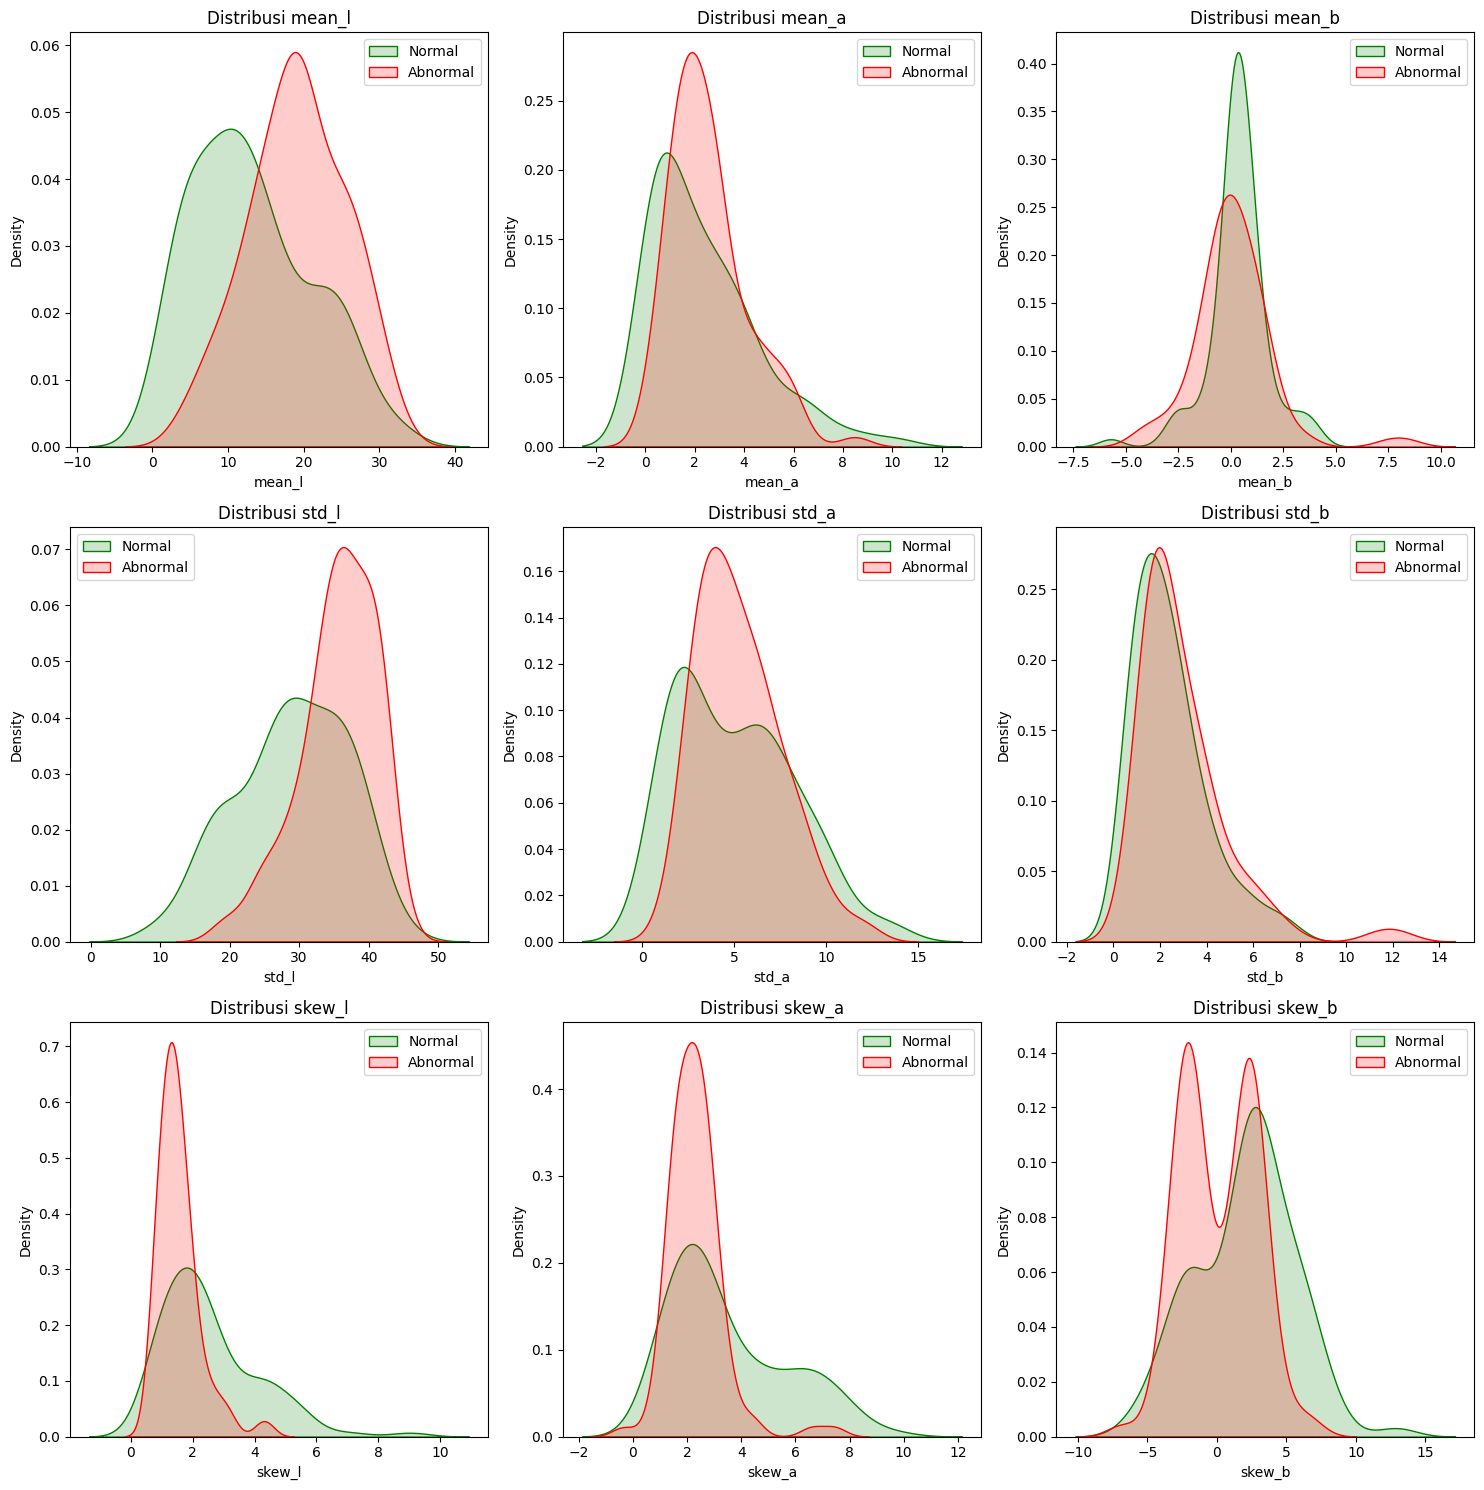

In [71]:
feature_list = [col for col in lab_features.columns if col != 'label']
plot_feature_distributions(lab_features, feature_list, grid_cols=3)

### Plot Pair Plots

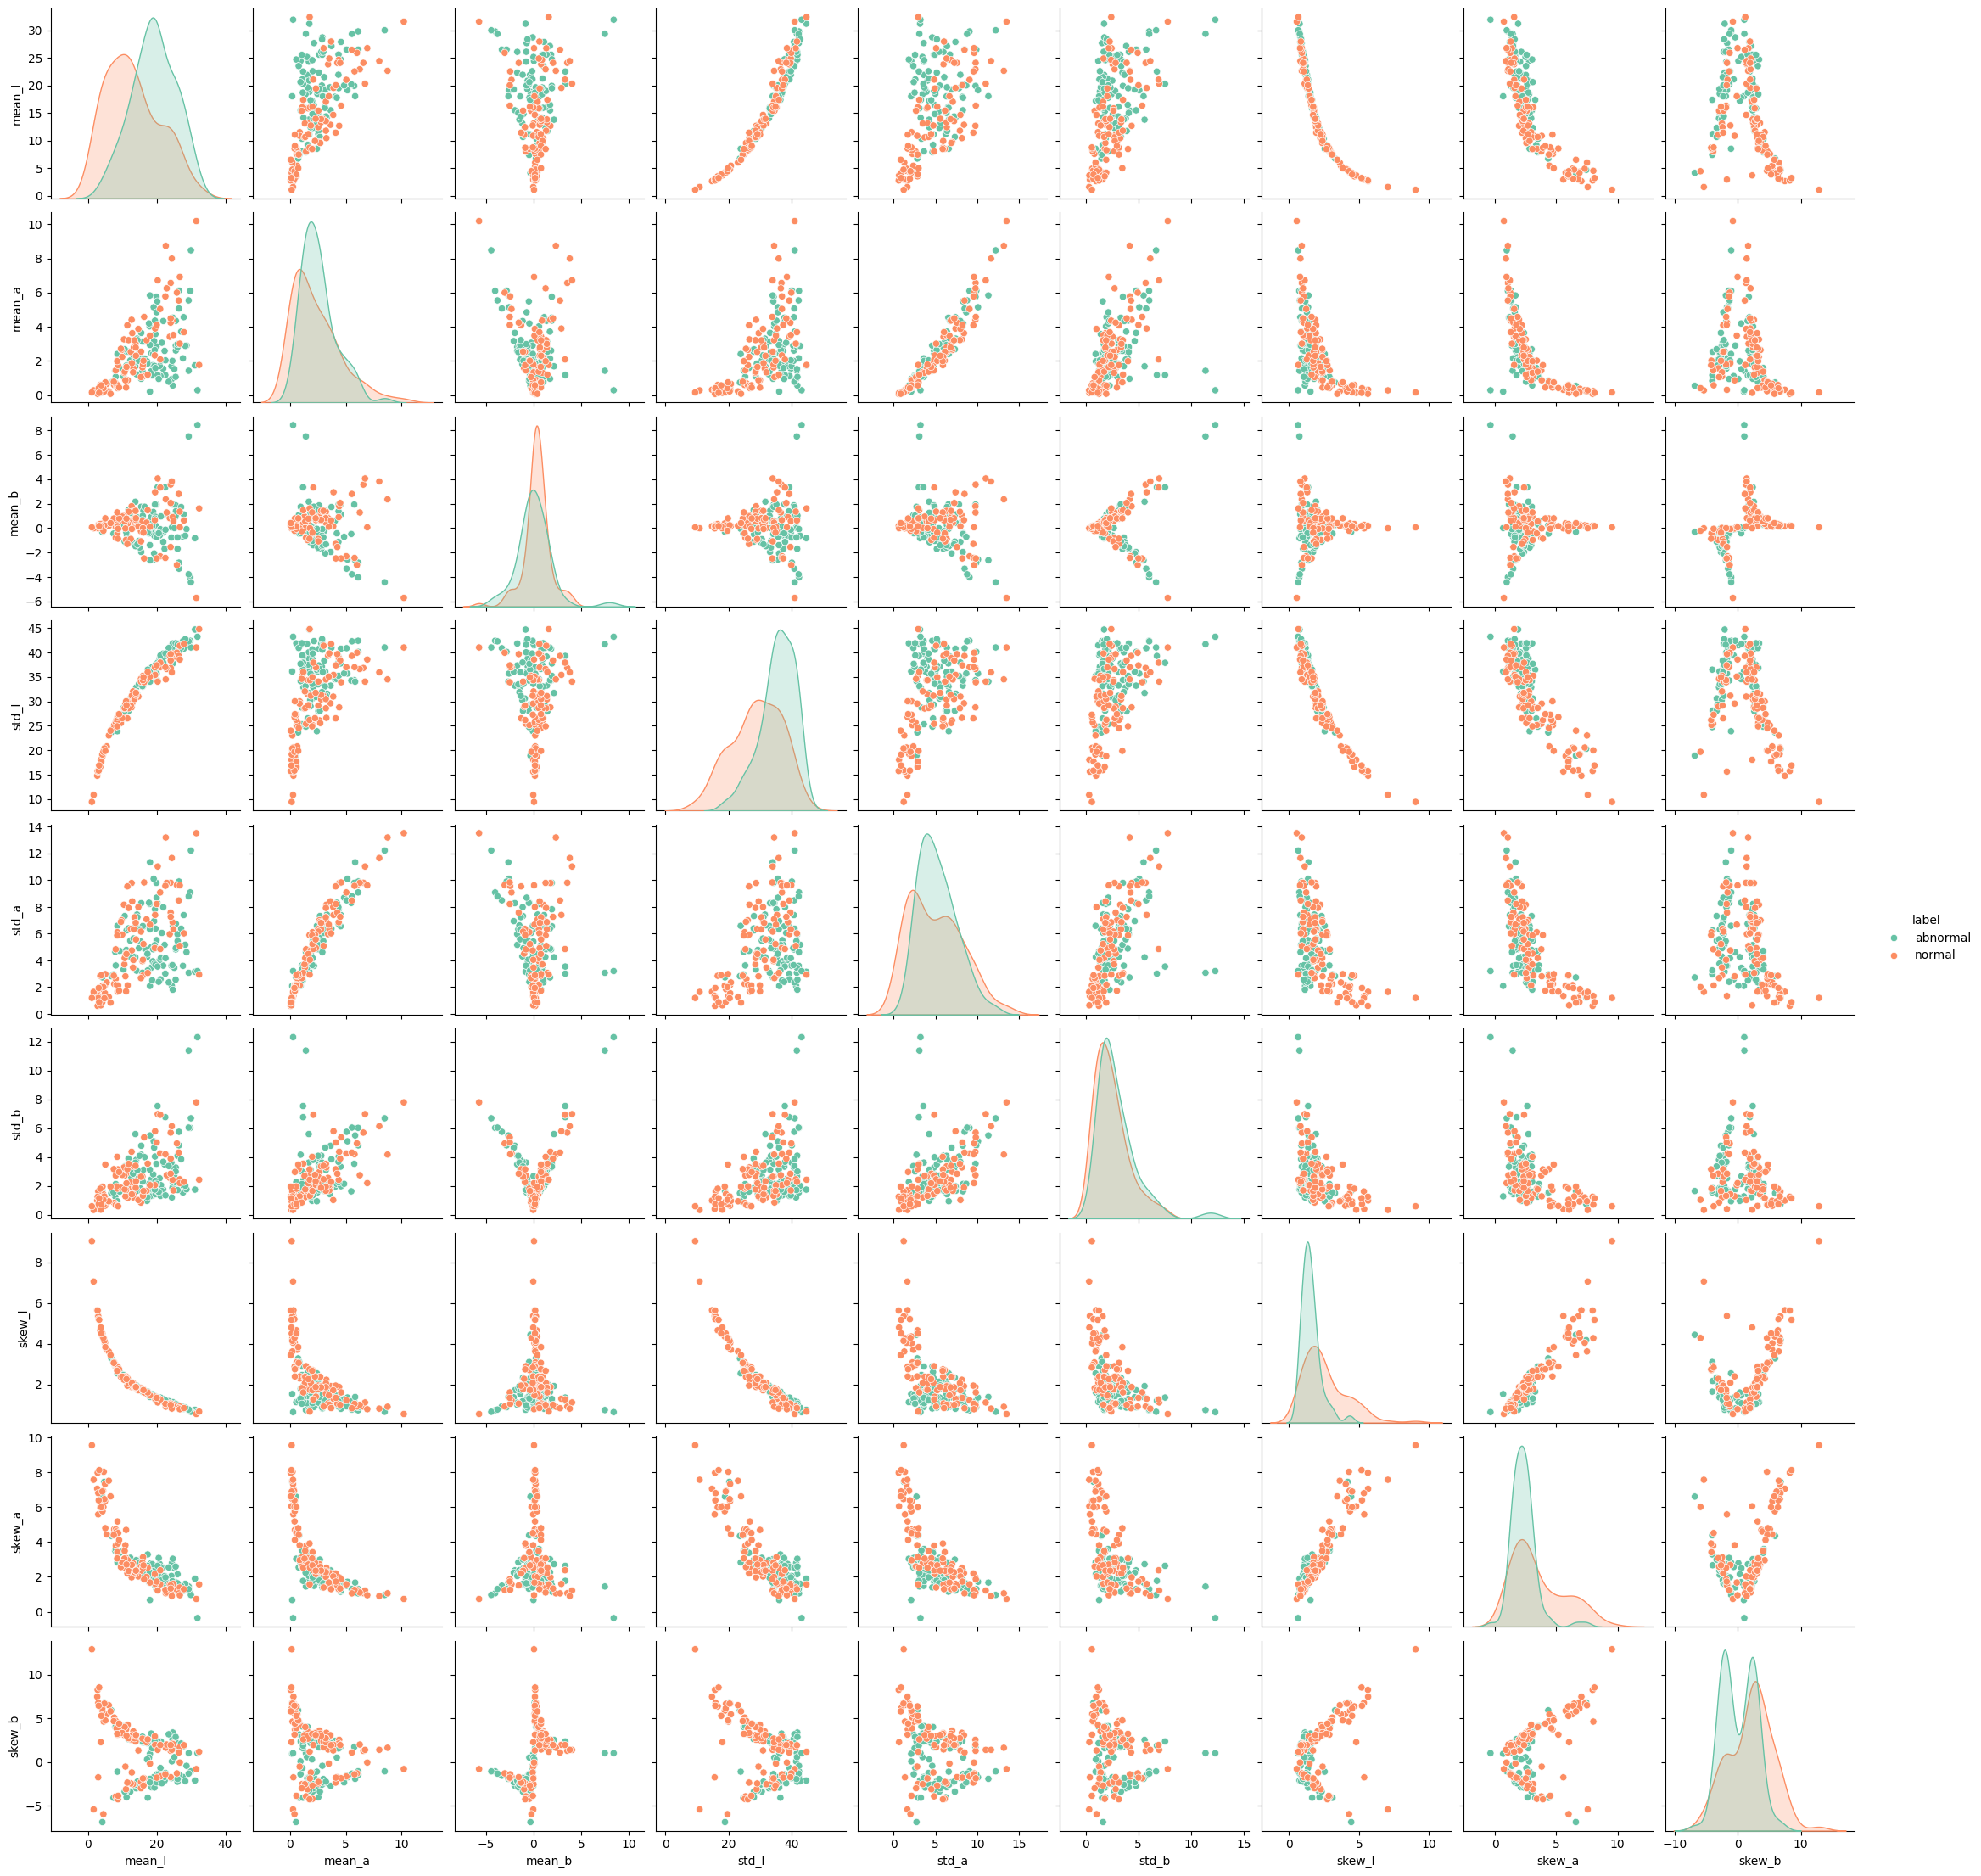

In [72]:
sns.pairplot(lab_features[feature_list + ['label']], hue='label', diag_kind='kde', palette='Set2')
plt.show()

## YUV Color Moments

### Plot Distributions

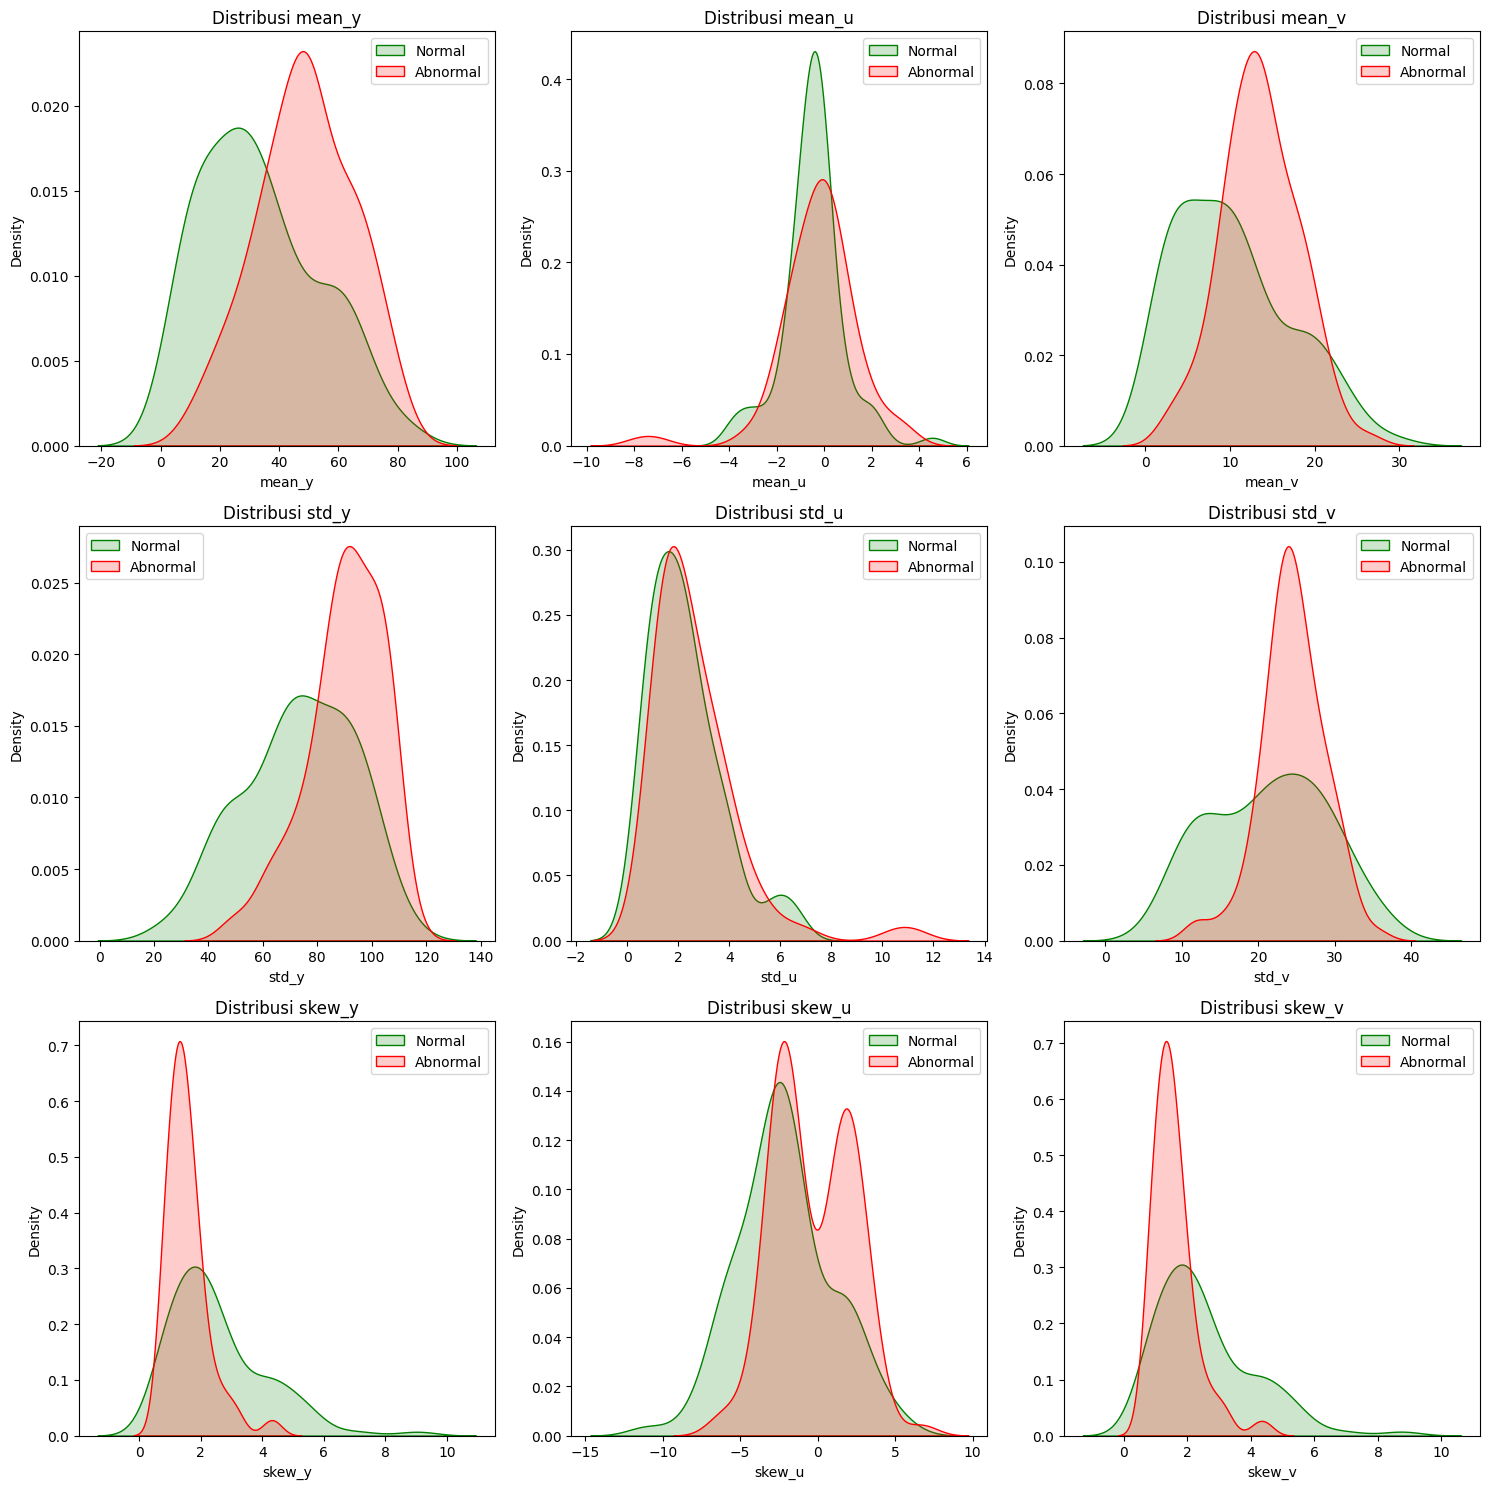

In [73]:
feature_list = [col for col in yuv_features.columns if col != 'label']
plot_feature_distributions(yuv_features, feature_list, grid_cols=3)

### Plot Pair Plots

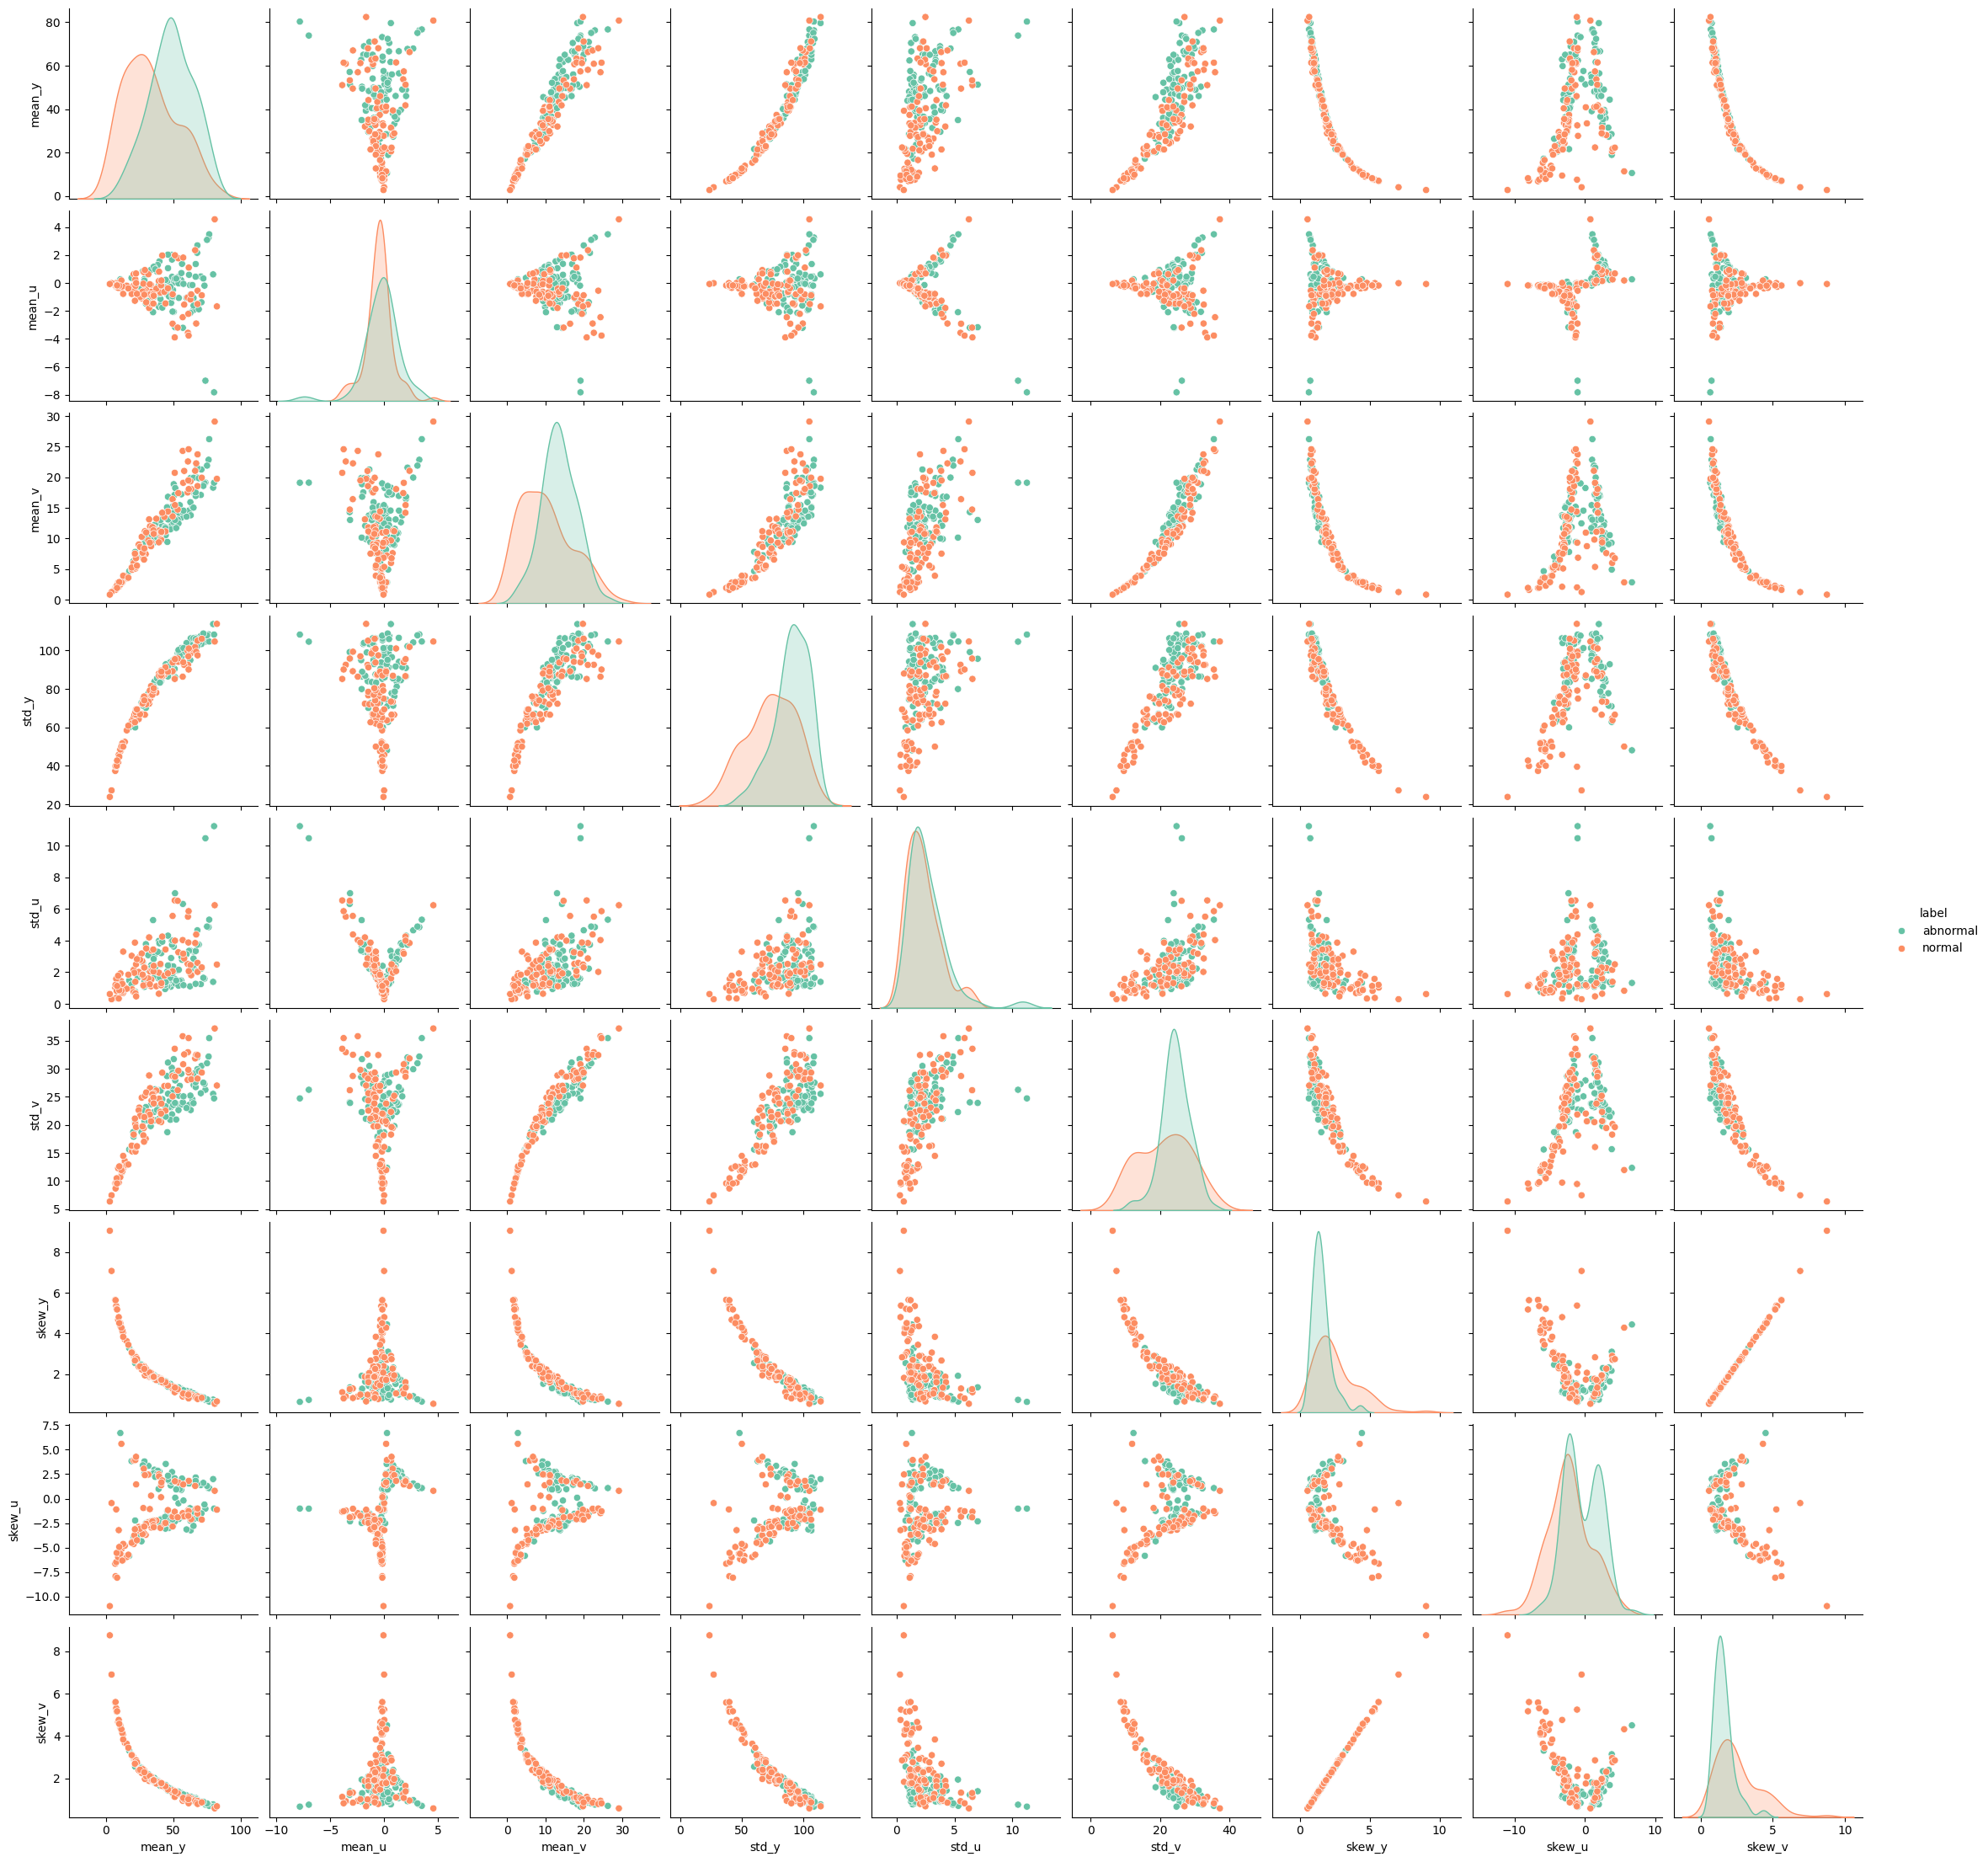

In [74]:
sns.pairplot(yuv_features[feature_list + ['label']], hue='label', diag_kind='kde', palette='Set2')
plt.show()

## RGB Color Moments

### Plot Distributions

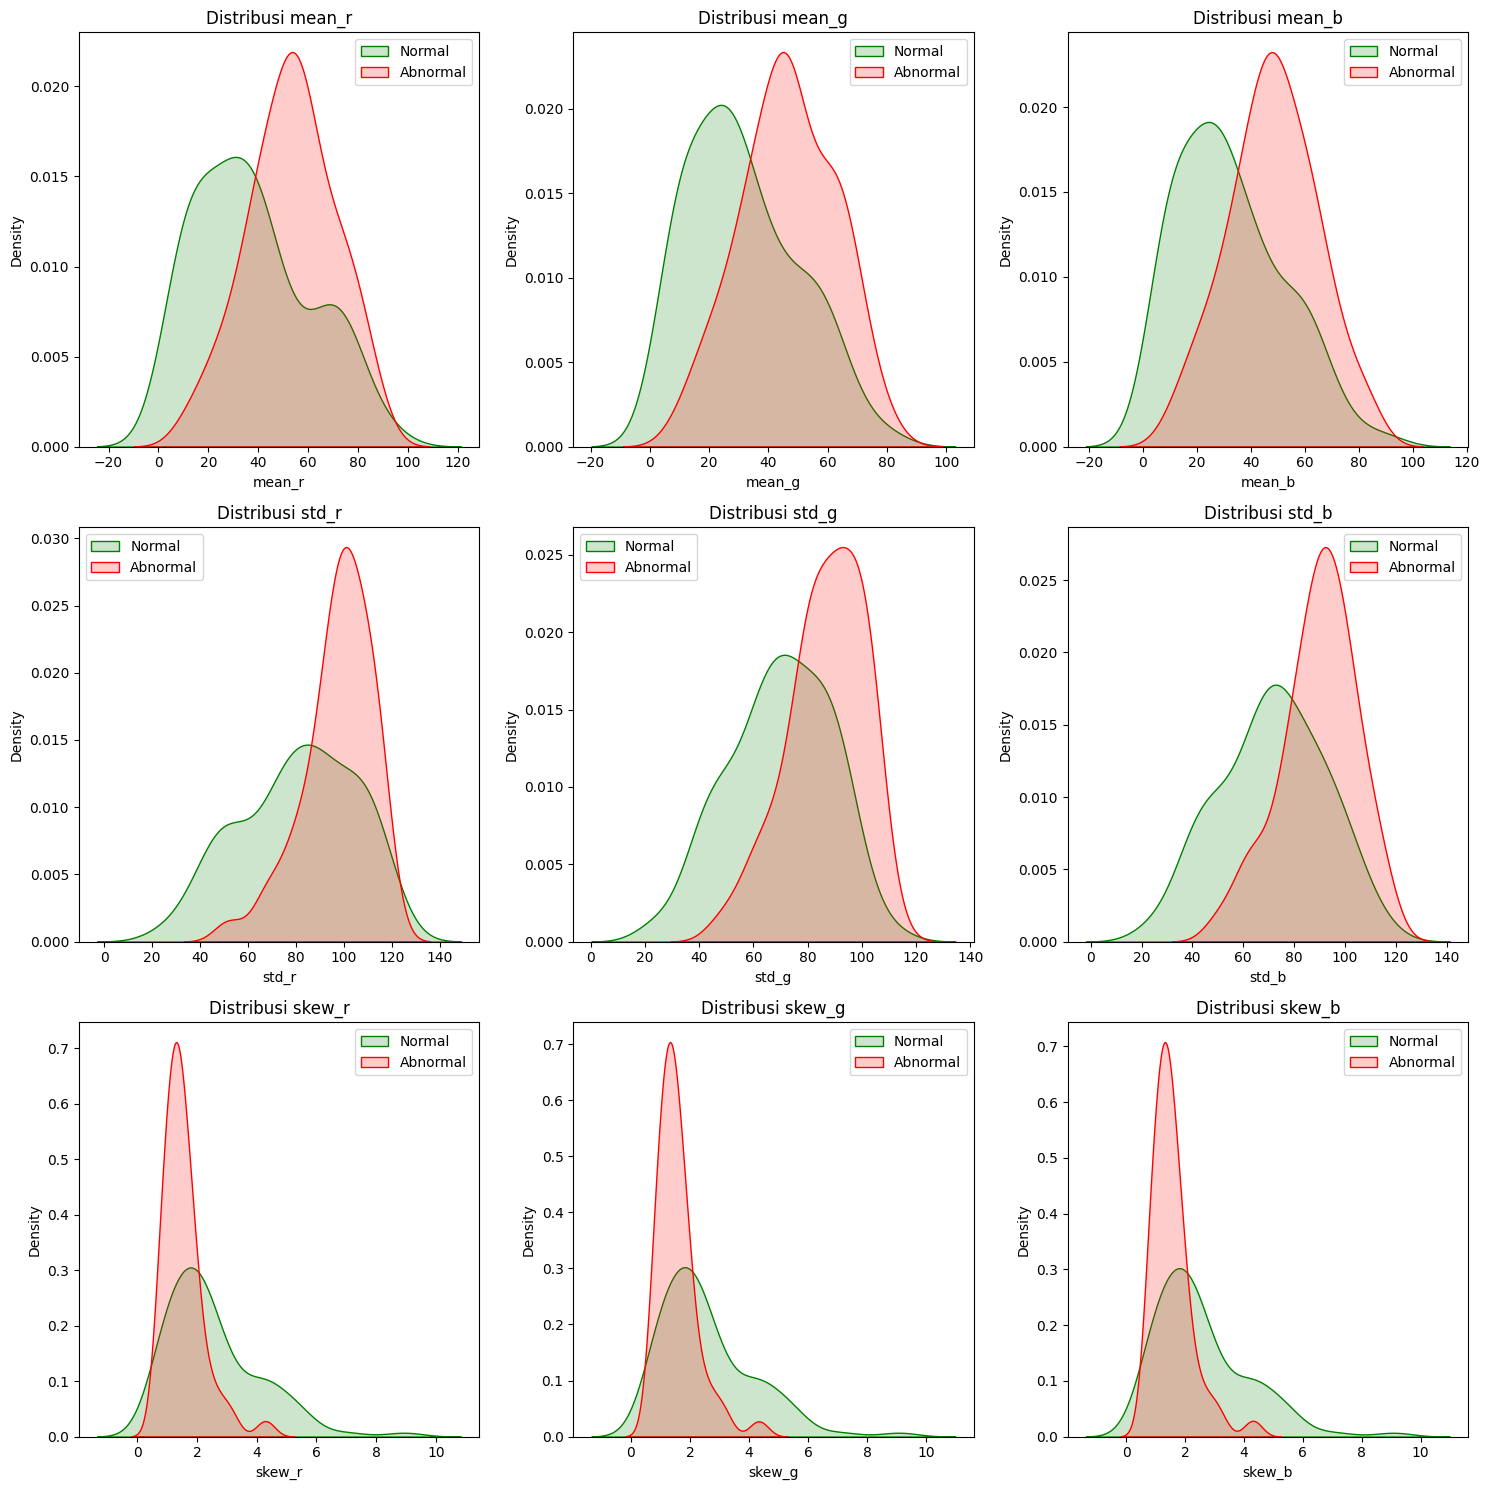

In [75]:
feature_list = [col for col in rgb_features.columns if col != 'label']
plot_feature_distributions(rgb_features, feature_list, grid_cols=3)

### Plot Pair Plots

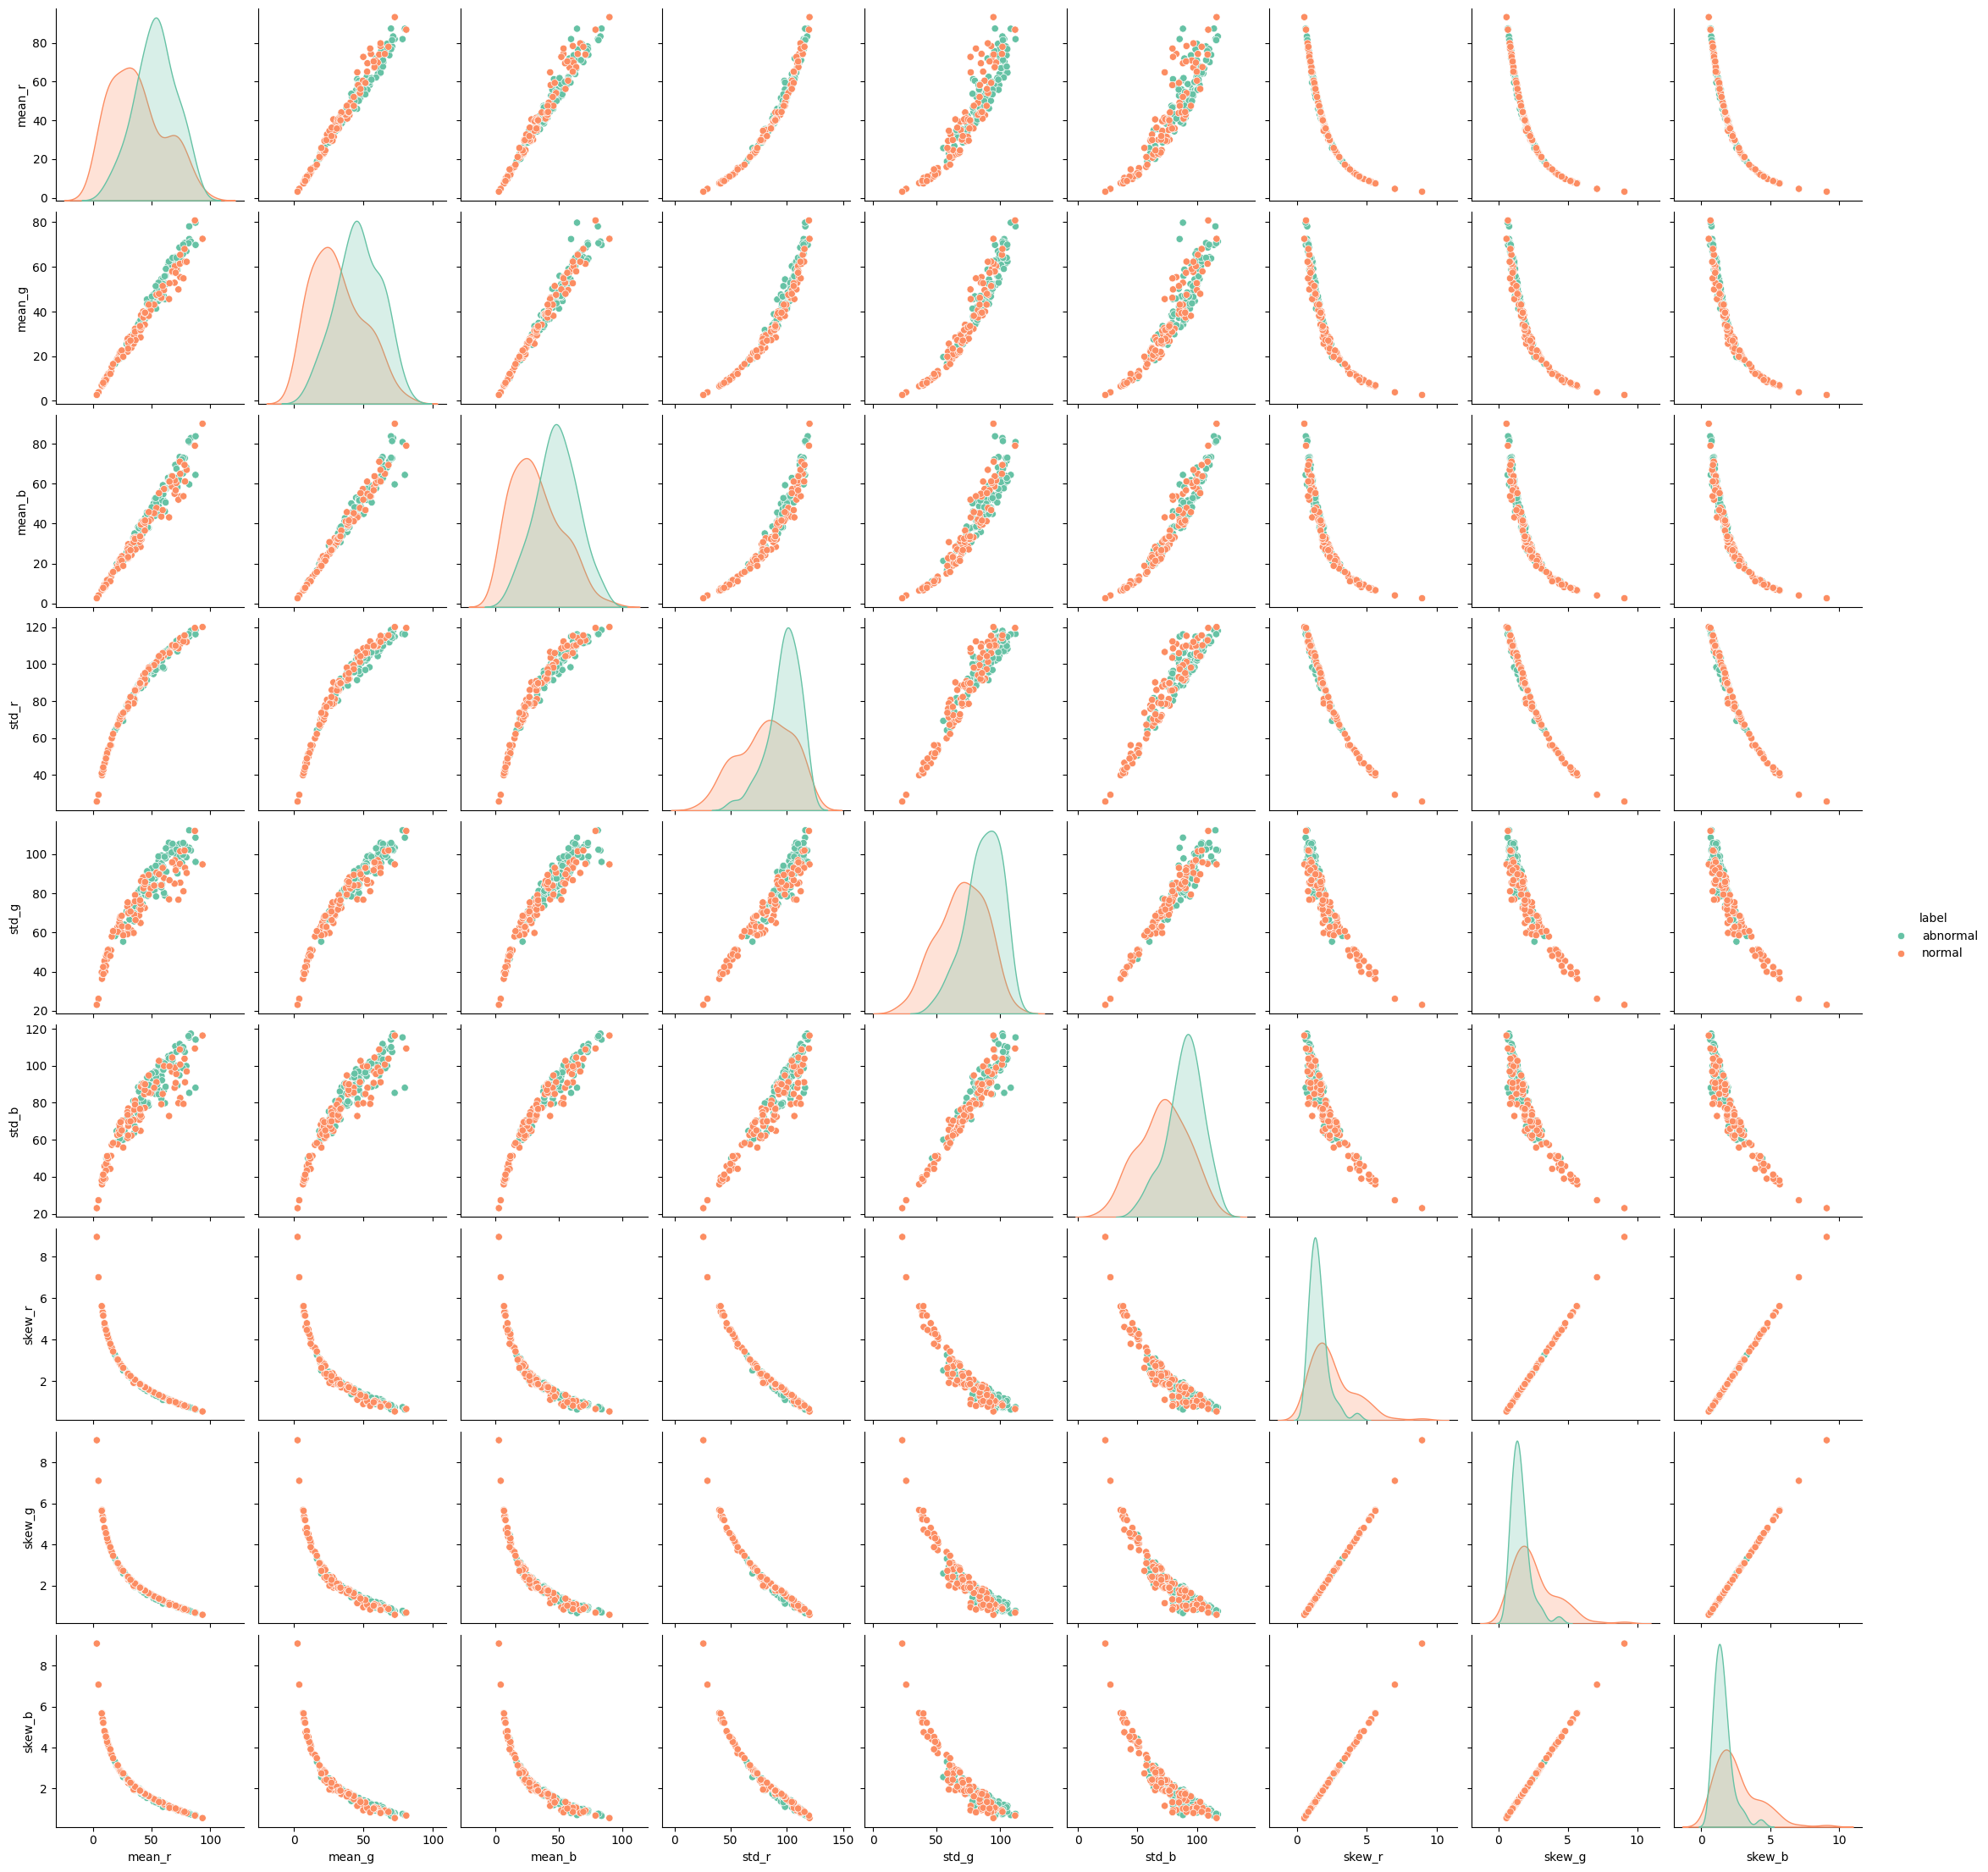

In [76]:
sns.pairplot(rgb_features[feature_list + ['label']], hue='label', diag_kind='kde', palette='Set2')
plt.show()